In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier

In [158]:
df = pd.read_csv('loan_detection.csv')
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [ ]:
df['Loan_Status_label'].value_counts()

# df_minority = df[df['Loan_Status_label'] == 1]
# df_majority = df[df['Loan_Status_label'] == 0]





ModuleNotFoundError: No module named 'imblearn'

## The Data is highly imbalanced (88:12)

so the model will have many false negative

In [ ]:
# from sklearn.utils import resample

# df_majority_new = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

# df = pd.concat([df_minority, df_majority_new])
# df

In [125]:
y = df.pop('Loan_Status_label')
x = df

In [ ]:
oversample = SMOTE()
x,y.fit_resample()

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [127]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.8986646433990896
0.896091284292304


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.9089226100151745
0.8885651857246905


In [ ]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)

print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

0.9041881638846737
0.8949987861131342


In [ ]:
rf = RandomForestClassifier(oob_score=True,max_depth=6)
rf.fit(x_train,y_train)

print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9001820940819424
0.896698227725176


In [ ]:
gb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
gb.fit(x_train,y_train)

print(gb.score(x_train,y_train))
print(gb.score(x_test,y_test))

0.9019726858877086
0.8968196164117505


In [132]:
xgb = XGBClassifier(n_estimators=1000,gamma=0.9,reg_alpha=0.2,reg_lambda=0.5,learning_rate=0.1,random_state=100)
xgb.fit(x_train,y_train)

print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

0.9080121396054628
0.8980335032774945


In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

In [134]:
pca.explained_variance_

array([3.46887701e+04, 1.08848435e+02, 7.70433948e+00])

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(pca_train)
x_test_sc = scaler.transform(pca_test)

In [ ]:
xgb2 = XGBClassifier(n_estimators=1000,gamma=0.9,reg_alpha=0.2,reg_lambda=0.5,learning_rate=0.1,random_state=100)
xgb2.fit(x_train_sc,y_train)

print(xgb2.score(x_train_sc,y_train))
print(xgb2.score(x_test_sc,y_test))

0.9002427921092564
0.8953629521728574


## Normal XGBoost is giving the best accuracy

Training XGBoost Model

In [137]:
train_pred = xgb.predict(x_train)
test_pred = xgb.predict(x_test)

In [138]:
print("Accuracy on training data is: ", accuracy_score(y_train,train_pred)*100, "%")
print("Accuracy on testing data is: ", accuracy_score(y_test,test_pred)*100, "%")

Accuracy on training data is:  90.80121396054628 %
Accuracy on testing data is:  89.80335032774946 %


<Axes: >

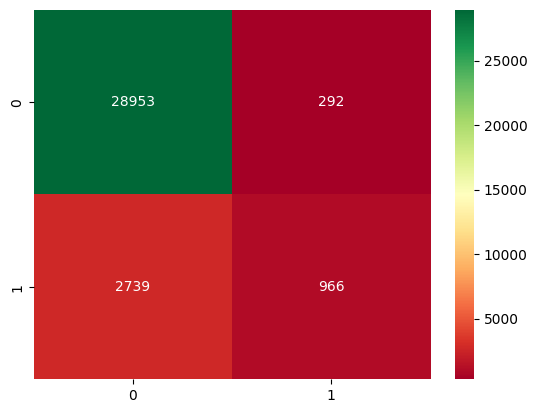

In [ ]:
sns.heatmap(confusion_matrix(y_train,train_pred), annot=True, cmap='RdYlGn', fmt='.0f')

<Axes: >

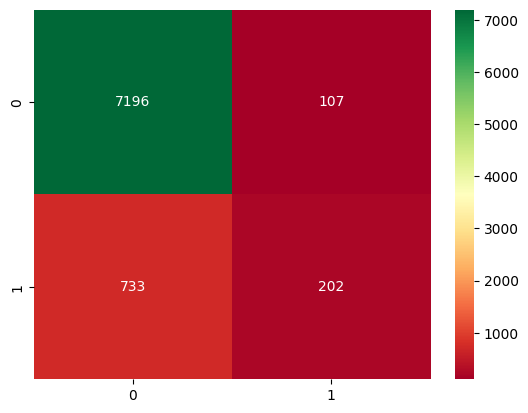

In [ ]:
sns.heatmap(confusion_matrix(y_test,test_pred), annot=True, cmap='RdYlGn', fmt='.0f')


In [ ]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29245
           1       0.77      0.26      0.39      3705

    accuracy                           0.91     32950
   macro avg       0.84      0.63      0.67     32950
weighted avg       0.90      0.91      0.89     32950

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7303
           1       0.65      0.22      0.32       935

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238

